In [9]:
"""
==========================================
IsolationForest example
==========================================

An example using :class:`sklearn.ensemble.IsolationForest` for anomaly
detection.

The IsolationForest 'isolates' observations by randomly selecting a feature
and then randomly selecting a split value between the maximum and minimum
values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the
number of splittings required to isolate a sample is equivalent to the path
length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure
of normality and our decision function.

Random partitioning produces noticeable shorter paths for anomalies.
Hence, when a forest of random trees collectively produce shorter path lengths
for particular samples, they are highly likely to be anomalies.

"""
# print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm          
# sys.path.insert(0, '/home/reza/erq/')
# from erqml import *
import os
from  sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Reading data
# smp=Table.read('/home/reza/erq/sampling/org_sample2.fits')
smp=Table.read('/home/reza/erq/LumMatch/LumMatch.fits')
iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
# rew_0  = np.log10(rew_0)
rng = np.random.RandomState(42)

In [4]:
# # Generate train data
# X = 0.3 * rng.randn(100, 2)
# X_train = np.r_[X + 2, X - 2]
# # Generate some regular novel observations
# X = 0.3 * rng.randn(20, 2)
# X_test = np.r_[X + 2, X - 2]
# # Generate some abnormal novel observations
# X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.array(list(zip(iW3_0, rew_0)))
pca = PCA()
X_train = pca.fit_transform(StandardScaler().fit_transform(X))
DF=[]
for i in tqdm(range(10)):
    # fit the model
#     print(i)
    nSample= 100
    cont = 0.01
    clf = IsolationForest(max_samples=nSample, random_state=rng, contamination=cont)
    clf.fit(X_train)
    y_pred_train = clf.predict(X_train)
    # y_pred_test = clf.predict(X_test)
    # y_pred_outliers = clf.predict(X_outliers)

    # plot the line, the samples, and the nearest vectors to the plane

#     xx, yy = np.meshgrid(np.linspace(np.min(iW3_0)-0.1, np.max(iW3_0)+0.1, 100), np.linspace(np.min(rew_0)-0.1, np.max(rew_0)+0.1, 100))
    xx, yy = np.meshgrid(np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100),
                         np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    DF.append(Z)
# np.savetxt('DF.dat', DF)


100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


(100, 100)


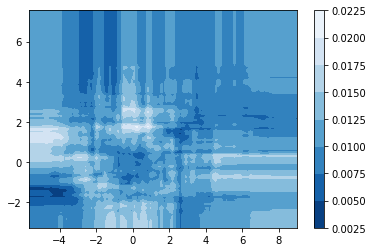

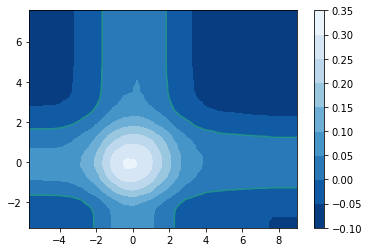

In [6]:
DF = np.array(DF)
DFerr = np.std(DF, axis=0) 
DFmed = np.mean(DF, axis=0) 
print(DFerr.shape)
plt.contourf(xx, yy, DFerr, cmap=plt.cm.Blues_r)
# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
#                     s=5)
plt.colorbar()
# plt.plot([4.6, np.max(iW3_0)], [2,2], ls='--', c='black')
# plt.plot([4.6, 4.6], [2,np.max(rew_0)], ls='--', c='black')
plt.savefig('iForest-DFerr.png', dpi=1800)
plt.show()
plt.clf()
plt.cla()
plt.close()
plt.contourf(xx, yy, DFmed, cmap=plt.cm.Blues_r)
plt.colorbar()

plt.contour(xx, yy, DFmed, levels=[-.6, 0, 0.6])

# plt.plot([4.6, np.max(iW3_0)], [2,2], ls='--', c='black')

# plt.plot([4.6, 4.6], [2,np.max(rew_0)], ls='--', c= 'black')
# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
#                     s=5)
plt.savefig('iForest-DFmed.png', dpi=1800)
plt.show()

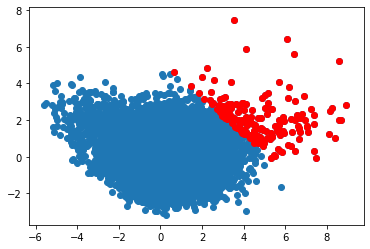

In [14]:
sc = StandardScaler().fit(X)
X_train = pca.fit_transform(sc.transform(X))
erqPCA = pca.transform(sc.transform(X[(iW3_0>=4.6) & (rew_0>=2)]))
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(erqPCA[:,0], erqPCA[:,1], c='r')